In [1]:
# Importing Packages

import numpy as np 

import statsmodels.api as sm

import matplotlib.pyplot as plt

import pandas as pd

import seaborn as sns

import quantecon as qe

from IPython.display import Markdown

from IPython.display import display, Latex

from scipy.stats import norm


In [2]:
# Setting the Seed

np.random.seed(22)

In [3]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199

### Exercise 1. The OLS asymptotic behavior. (20 points) Prove that the OLS estimator is distributed asymptotically normal using Monte Carlo simulation.

#### 1a) As a preliminary step, create a sample with size $N = 100$, a fictitious $x_{2} \sim \mathcal{N}(0, 1)$, and estimate the model by OLS.

In [4]:
# Defining the parameters 
N = 100
mu = 0
sigma_x = 1
sigma_e = 5
x2 = np.random.normal(mu, sigma_x, N)
e_i = np.random.normal(mu, sigma_e, N)

x2 = sm.add_constant(x2)

# Defining y

y = 2 + 0.5*x2[:, 1] + e_i  

# Fit the linear regression model
model = sm.OLS(y, x2).fit()

# View the model summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.067
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     7.042
Date:                Mon, 12 Feb 2024   Prob (F-statistic):            0.00929
Time:                        13:08:27   Log-Likelihood:                -304.02
No. Observations:                 100   AIC:                             612.0
Df Residuals:                      98   BIC:                             617.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4271      0.512      6.696      0.0

In [5]:
# We can also just extract the betas for simplicity 

from IPython.display import display, Markdown

beta0 = model.params[0]
beta1 = model.params[1]

# Format with two significant figures
beta0_formatted = f"{beta0:.2f}"
beta1_formatted = f"{beta1:.2f}"

# Creating the markdown table string
markdown_table = f"""
| Coefficient       | Value |
|-----------------|-------|
| $\\hat{{\\beta}}_0$ | {beta0_formatted}  |
| $\\hat{{\\beta}}_1$ | {beta1_formatted}  |
"""

# Display the markdown table
display(Markdown(markdown_table))



| Coefficient       | Value |
|-----------------|-------|
| $\hat{\beta}_0$ | 3.43  |
| $\hat{\beta}_1$ | 1.38  |


#### 1b) i) Now, following the steps in lecture 4, slide 12, run a Monte Carlo simulation to show the asymptotic properties and replicate figure 1 and figure 2 from slide 13. 


In [6]:

# Step 1: Set T repetitions

T = 10000

# Step 2: Create an empty list to store the results 

beta0 = []
beta1 = []


# Step 3: For loop

for i in range (1,T):
    x2 = np.random.normal(0, 1, N)
    x2 = sm.add_constant(x2)
    e_i = np.random.normal(0, 5, N)
    y = 2 + 0.5*x2[:, 1] + e_i 
    model = sm.OLS(y, x2).fit()
    beta0.append(model.params[0])
    beta1.append(model.params[1])
    


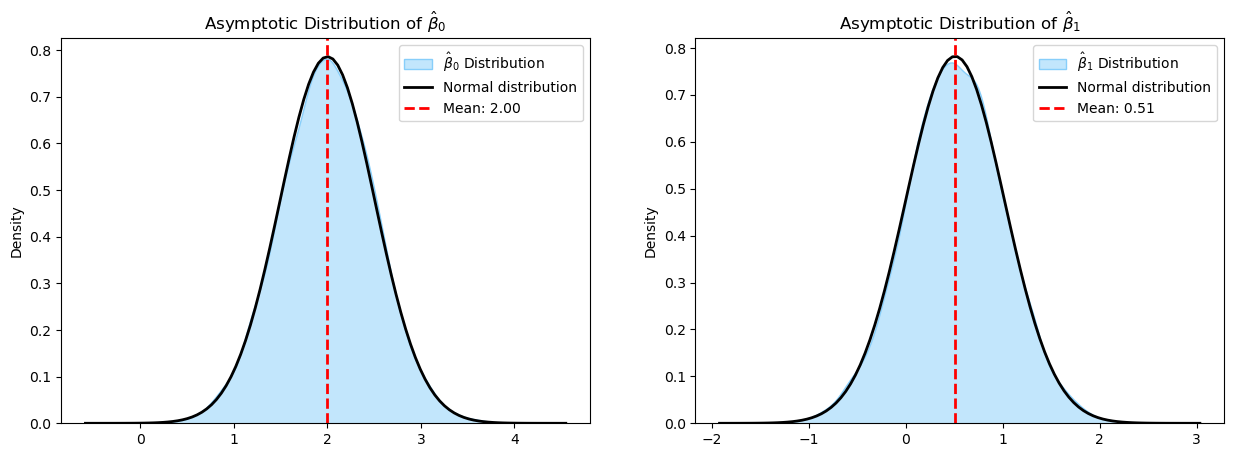

In [7]:
# Step 4: Plot the distribution of the coefficients 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Calculating means and standard deviations
mean_b0 = np.mean(beta0)
std_b0 = np.std(beta0)
mean_b1 = np.mean(beta1)
std_b1 = np.std(beta1)

# Plot for Beta 0 Distribution

sns.kdeplot(beta0, ax=ax[0], color="lightskyblue", label=r"$\hat{\beta}_0$ Distribution", alpha=0.5, fill=True)

# Adding a normal distribution overlay to the Beta 0 Distribution
xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_b0, std_b0)
ax[0].plot(x, p, 'k', linewidth=2, label="Normal distribution")
ax[0].axvline(mean_b0, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_b0:.2f}')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Asymptotic Distribution of $\hat{\beta}_{0}$")

# Plot for Beta 1 Distribution
sns.kdeplot(beta1, ax=ax[1], color="lightskyblue", label=r"$\hat{\beta}_1$ Distribution", alpha=0.5, fill=True)

# Adding a normal distribution overlay to the Beta 1 Distribution
xmin, xmax = ax[1].get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_b1, std_b1)
ax[1].plot(x, p, 'k', linewidth=2, label="Normal distribution")
ax[1].axvline(mean_b1, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_b1:.2f}')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Asymptotic Distribution of $\hat{\beta}_{1}$")

# Plotting the final output

plt.show()



#### 1b) ii) What is the type of distribution shown? What is the Monte-Carlo approximation of the mean and the approximation of variance?

In [8]:
# Computing the means of the distributions and formatting them to 2 sig figs

beta0_mean = np.mean(beta0)
beta1_mean = np.mean(beta1)


beta0_mean_formatted = f"{beta0_mean:.2f}"
beta1_mean_formatted = f"{beta1_mean:.2f}"

# Computing the variances of the distributions and formatting them to 2 sig figs

beta0_var = np.var(beta0)
beta1_var = np.var(beta1)

beta0_var_formatted = f"{beta0_var:.2f}"
beta1_var_formatted = f"{beta1_var:.2f}"


# Creating a markdown table to present the results

markdown_table_1b = f"""
| Moment       | $\\hat{{\\beta}}_0$ | $\\hat{{\\beta}}_1$ |
|-----------------|---------------|---------------|
| First Moment (Mean) | {beta0_mean_formatted}  | {beta1_mean_formatted} |
| Second Moment (Variance) | {beta0_var_formatted}  | {beta1_var_formatted} |
"""

display(Markdown(markdown_table_1b))





| Moment       | $\hat{\beta}_0$ | $\hat{\beta}_1$ |
|-----------------|---------------|---------------|
| First Moment (Mean) | 2.00  | 0.51 |
| Second Moment (Variance) | 0.26  | 0.26 |


#### 1c) Redo exercise a) with a sample size N = 1000. How do the  asymptotic distributions change when the sample size increases?

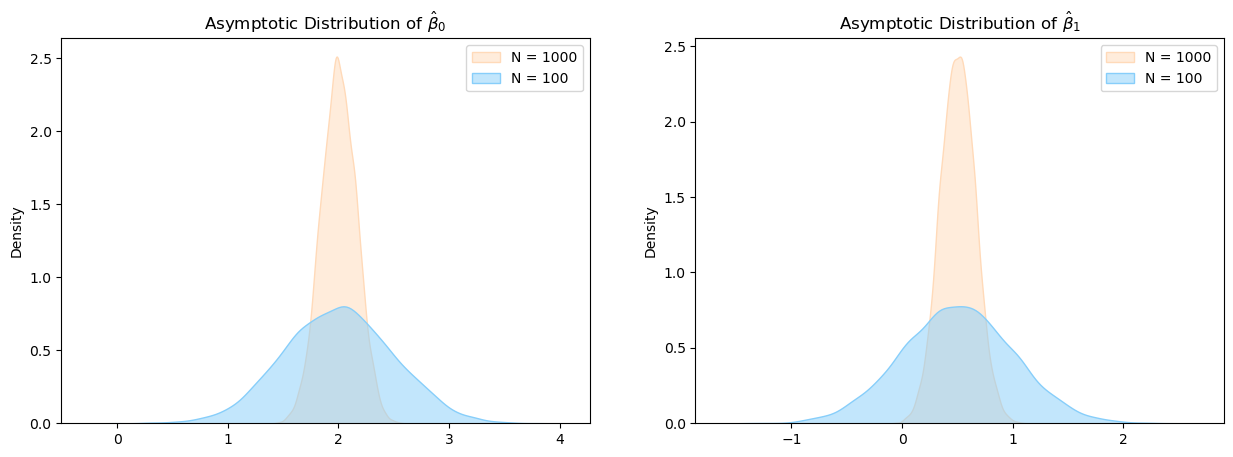

In [9]:
# Function to run simulation
def simulate_ols(T, N):
    beta0, beta1 = [], []
    for i in range(1, T):
        x2 = np.random.normal(0, 1, N)
        x2 = sm.add_constant(x2)
        e_i = np.random.normal(0, 5, N)
        y = 2 + 0.5*x2[:, 1] + e_i
        model = sm.OLS(y, x2).fit()
        beta0.append(model.params[0])
        beta1.append(model.params[1])
    return beta0, beta1

# Simulating for N = 1000
T = 10000
N = 1000
beta0_1000, beta1_1000 = simulate_ols(T, N)

# Simulating for N = 100
N = 100
beta0_100, beta1_100 = simulate_ols(T, N)

# Plotting the distributions
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Beta 0 Distribution
sns.kdeplot(beta0_1000, ax=ax[0], color="peachpuff", label="N = 1000", alpha=0.5, fill=True)
sns.kdeplot(beta0_100, ax=ax[0], color="lightskyblue", label="N = 100", alpha=0.5, fill=True)
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Asymptotic Distribution of $\hat{\beta}_{0}$")

# Beta 1 Distribution
sns.kdeplot(beta1_1000, ax=ax[1], color="peachpuff", label="N = 1000", alpha=0.5, fill=True)
sns.kdeplot(beta1_100, ax=ax[1], color="lightskyblue", label="N = 100", alpha=0.5, fill=True)
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Asymptotic Distribution of $\hat{\beta}_{1}$")

plt.show()


In [10]:
## Calculating the means for the N = 1000 distribution and formatting them to 2 sig figs

beta0_1000_mean = np.mean(beta0_1000)
beta1_1000_mean = np.mean(beta1_1000)

beta0_1000_mean_formatted = f"{beta0_1000_mean:.2f}"
beta1_1000_mean_formatted = f"{beta1_1000_mean:.2f}"

## Calculating variance for the N = 1000 distribution and formatting them to 2 sig figs

beta0_1000_var = np.var(beta0_1000)
beta1_1000_var = np.var(beta1_1000)

beta0_1000_var_formatted = f"{beta0_1000_var:.2f}"
beta1_1000_var_formatted = f"{beta1_1000_var:.2f}"

## Creating a comparison table

markdown_table_1c = f"""
| Moment       | $\\hat{{\\beta}}_0$ (N = 100)| $\\hat{{\\beta}}_0$ (N = 1000) | $\\hat{{\\beta}}_1$ (N = 100) | $\\hat{{\\beta}}_1$ (N = 1000) |
|-----------------|---------------|---------------|---------------|---------------|
| First Moment (Mean) | {beta0_mean_formatted}  | {beta0_1000_mean_formatted} | {beta1_mean_formatted} | {beta1_1000_mean_formatted} |
| Second Moment (Variance) | {beta0_var_formatted}  | {beta0_1000_var_formatted} | {beta1_var_formatted} | {beta1_1000_var_formatted} |
"""

display(Markdown(markdown_table_1c))





| Moment       | $\hat{\beta}_0$ (N = 100)| $\hat{\beta}_0$ (N = 1000) | $\hat{\beta}_1$ (N = 100) | $\hat{\beta}_1$ (N = 1000) |
|-----------------|---------------|---------------|---------------|---------------|
| First Moment (Mean) | 2.00  | 2.00 | 0.51 | 0.50 |
| Second Moment (Variance) | 0.26  | 0.03 | 0.26 | 0.02 |


#### Comparing Means: Law of Large Numbers

We observe that the first moment remains the same across the two distributions. This is likely because $N = 100$ was sufficiently large to active that Law of Large Numbers (LLN). The LLN posits that as the sample size ($N$) increases, the sample mean of independent and identically distributed (i.i.d.) observations will converge to the expected value (mean) of the population distribution, assuming that this expected value exists and is finite.

Mathematically, if $X_1, X_2, \ldots, X_N$ are i.i.d. random variables with expected value $E[X] = \mu$ and variance $Var(X) = \sigma^2 < \infty$, then as $N \rightarrow \infty$, the sample mean $\bar{X}_N = \frac{1}{N}\sum_{i=1}^{N}X_i$ converges in probability to $\mu$ (i.e. the population mean):

$$\lim_{N \rightarrow \infty} P\left(\left|\bar{X}_N - \mu\right| > \epsilon\right) = 0, \quad \forall \epsilon > 0$$

This result is known as the Weak Law of Large Numbers. It implies that for a large enough $N$, the sample mean is a consistent estimator of the population mean. $N = 100$ and $N = 1000$ yield the essentially same estimated mean (i.e. the slight difference is caused by rounding), thus as likely both "sufficiently large". 

#### Comparing Variances

The mathematical reason for the decrease in variance of estimates with larger sample sizes can be explained through the properties of variance for independent and identically distributed (i.i.d.) random variables. Consider the variance of the sample mean for i.i.d. random variables $X_1, X_2, \ldots, X_N$ with common expected value $\mu = E[X_i]$ and finite variance $\sigma^2 = Var(X_i)$. The variance of the sample mean $\bar{X}_N = \frac{1}{N}\sum_{i=1}^{N}X_i$ is given by:

$$
Var(\bar{X}_N) = Var\left(\frac{1}{N}\sum_{i=1}^{N}X_i\right) = \frac{1}{N^2}\sum_{i=1}^{N}Var(X_i) = \frac{N\sigma^2}{N^2} = \frac{\sigma^2}{N}.
$$

This formula demonstrates that the variance of the sample mean decreases inversely with the sample size ($N$). The $\frac{1}{N}$ term in $Var(\bar{X}_N)$ signifies that as $N$ grows, the dispersion of the sample mean around the true mean $\mu$ becomes narrower. Consequently, the estimate of the mean becomes more precise as our sample size increased from $N = 100$ to $N = 1000$.






### Exercise 2. Solving the earnings distribution in an Aiyagari economy (50 points). In the Aiyagari model—one of the fundamental models in quantitative macroeconomics — "there is a very large number of households" whose log of labor earnings ($y_t$) follows the next AR(1) process

#### 2a) Simulate and plot the AR(1) process given by equation (1) for $T = 50$ periods.

In [11]:
# Creating the AR(1) function

def ar_1_sim(T,rho,y0=0,a=0,sigma_e=0.25):
    ''' 
    ar_1_sim simulates for T periods an AR(1) process of the following form:
                y_t+1 = a + rho*y_t + e_t
                where e_t ~ N (0,sigma_e)
    '''
    y = np.empty(T)
    y[0] = y0
    for i in range(1,T):
        e = np.random.normal(0,sigma_e,1) 
        y[i] = a+ rho*y[i-1]+e
   
    return y

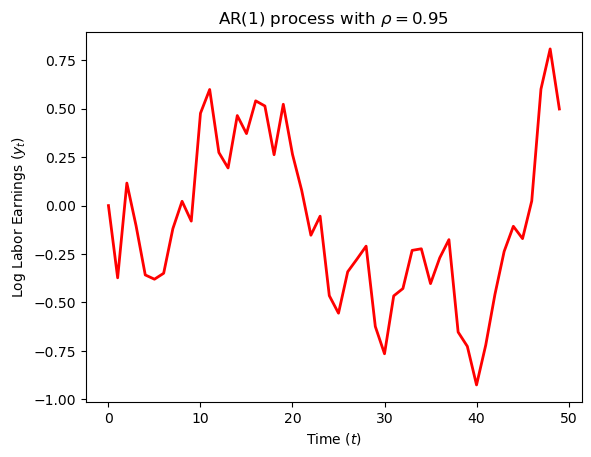

In [12]:
# Simulating and plotting the specified AR(1) process

# Defining the parameters

T = 50
rho = 0.95

# Calling the AR(1) function

y = ar_1_sim(T, rho)

# Plotting the AR(1) process

fig, ax = plt.subplots()
ax.plot(range(0,T), y, linewidth=2.0, color='r') 
ax.set_ylabel(r"Log Labor Earnings ($y_{t}$)")
ax.set_xlabel(r"Time ($t$)")
plt.title(fr"AR(1) process with $\rho = {rho}$")
plt.show()


#### 2b) Create a function that simulates N AR(1) processes for $T$ periods.

In [13]:
def N_ar_1_sim(N, T, rho, y0=0, a=0, sigma_e=0.25):
    simulated_ars = []
    for j in range (0, N):
        y = np.empty(T)
        y[0] = y0
        for i in range(1,T):
            e = np.random.normal(0,sigma_e,1) 
            y[i] = a+ rho*y[i-1]+e
        simulated_ars.append(y)
    return np.array(simulated_ars)


#### 2c) i) Simulate and plot 5 AR(1) processes given by equation (1) for $t = 50$ periods. 

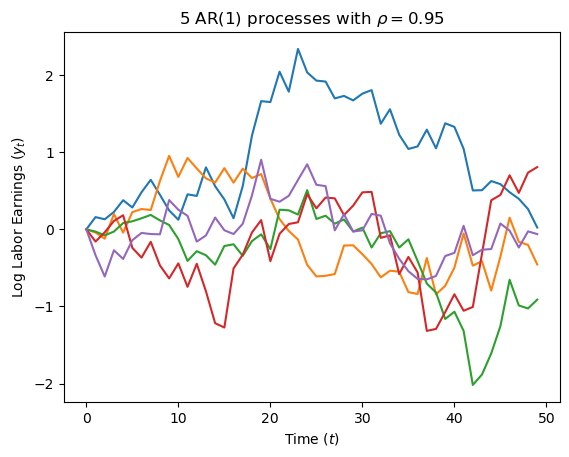

In [14]:
# Defining the parameters

N = 5
T = 50
rho = 0.95
a = 0
sigma_e=0.25

# Calling the N AR(1) process function

y5 = N_ar_1_sim(N, T, rho, y0=0, a=0, sigma_e=0.25)

# Plotting y5

fig, ax = plt.subplots()
ax.plot(y5.transpose()) 
ax.set_ylabel(r"Log Labor Earnings ($y_{t}$)")
ax.set_xlabel(r"Time ($t$)")
plt.title(fr"5 AR(1) processes with $\rho = {rho}$")
plt.show()

#### 2c) ii) What is the sample mean and sample variance?

In [15]:
# Calculate overall sample mean and variance
overall_mean_y5 = np.mean([np.mean(y5)])
overall_variance_y5 = np.var([np.var(y5)])

# Preparing the header of the Markdown table
markdown_table = "| Order of AR(1) process | Mean | Variance |\n"
markdown_table += "|------------------------|------|----------|\n"

# Adding overall mean and variance in the first row
markdown_table += "| Overall ($y_5$) | {:.2f} | {:.2f} |\n".format(overall_mean_y5, overall_variance_y5)

ordinal = ["First AR(1) Process", "Second AR(1) Process", "Third AR(1) Process",
           "Fourth AR(1) Process", "Fifth AR(1) Process"]  

# Looping through each AR(1) process to calculate mean and variance
for i in range(0, 5):
    mean = np.mean(y5[i])
    variance = np.var(y5[i], ddof=1)  # using ddof=1 for sample variance
    # Adding each row of data to the Markdown table
    markdown_table += "| {} | {:.2f} | {:.2f} |\n".format(ordinal[i], mean, variance)

# Displaying the Markdown table
display(Markdown(markdown_table))

| Order of AR(1) process | Mean | Variance |
|------------------------|------|----------|
| Overall ($y_5$) | 0.07 | 0.00 |
| First AR(1) Process | 0.95 | 0.44 |
| Second AR(1) Process | -0.04 | 0.29 |
| Third AR(1) Process | -0.34 | 0.33 |
| Fourth AR(1) Process | -0.20 | 0.33 |
| Fifth AR(1) Process | -0.01 | 0.13 |


#### 2c) iii) What are the stationary values of the mean and variance?

In [16]:
# Defining the parameters

N = 5
T = 50
rho = 0.95
a = 0
sigma_e=0.25

# Computing the stationary mean and variance
mu_stationary = a/(1-rho) 
var_stationary = (sigma_e**2) / (1-rho**2)

# Formatting the values 

formatted_mu_stationary = f"{mu_stationary:.2f}"
formatted_var_stationary = f"{var_stationary:.2f}"


markdown_table_2c = f"""
| Description           | Mean  | Variance |
|-----------------------|----------------------|--------------------------|
| Stationary Values | {formatted_mu_stationary}  | {formatted_var_stationary}     |
| Sample Estimates      | {overall_mean_y5:.2f} | {overall_variance_y5:.2f}|
"""

display(Markdown(markdown_table_2c))


| Description           | Mean  | Variance |
|-----------------------|----------------------|--------------------------|
| Stationary Values | 0.00  | 0.64     |
| Sample Estimates      | 0.07 | 0.00|


#### 2d) The stationary earnings distribution.

#### Simulate for a large $T$ (like $T = 1000$) the AR(1) process of $10,000$ individuals. Use the result of the last period to plot the stationary distribution. 

#### Comment whether the stationary distributions of log-earnings $y_t$ and earnings $e^{y_t}$resemble to distributions seen in in previous problem sets or lecture.

In [17]:
# Defining the parameters
N = 10000
T = 1000
rho = 0.95

# Calling the AR(1) function
y10000 = N_ar_1_sim(N, T, rho)

# Collecting the stationary value using the specification given in 2d

stationary_y10000 = y10000[:, T-1]

stationary_e_y10000 = np.exp(stationary_y10000)

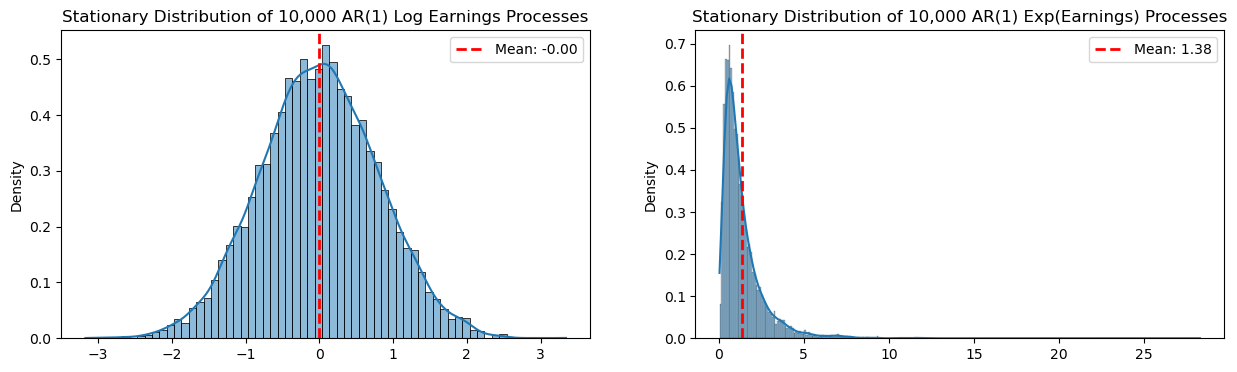

In [18]:
# Plot distribution of stationary earnings 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))


# Stationary Distribution of 10,000 AR(1) Log Earnings Processes
mean_stationary_y10000 = np.mean(stationary_y10000)
sns.histplot(stationary_y10000, ax=ax[0], kde=True, stat="density")
ax[0].axvline(mean_stationary_y10000, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_stationary_y10000:.2f}')
ax[0].set_ylabel('Density')
ax[0].legend()
ax[0].set_title(r"Stationary Distribution of 10,000 AR(1) Log Earnings Processes")

# Stationary Distribution of 10,000 AR(1) Exp(Earnings) Processes

mean_stationary_e_y10000 = np.mean(stationary_e_y10000)
sns.histplot(stationary_e_y10000, ax=ax[1], kde=True, stat="density")
ax[1].axvline(mean_stationary_e_y10000, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_stationary_e_y10000:.2f}')
ax[1].set_ylabel('Density')
ax[1].legend()
ax[1].set_title(r"Stationary Distribution of 10,000 AR(1) Exp(Earnings) Processes")

plt.show()


The stationary distribution of the log earnings process (LHS diagram) approximates a normal distribution, which is because logarithmizing a vairable can normalize its distribution. 

The exponentiated earnings (RHS diagram) resemble a log normal distribution. This is because exponentiating earnings means that large values become extremely large, drawing out the right-ward tail.

#### 2e) From the stationary distribution you previously computed, compute the mean and variance of the log of earnings ($y_t$) and compute the Gini coefficient of earnings ($e^{y_t}$ ). Do the sample analogs approximate well the true values of mean and variange of the log of earnings? Does this income process generate a high or low income inequality?

In [19]:
## Computing mean of the stationary distribution 

mean_stationary_y10000 = np.mean(stationary_y10000)

formatted_mean_stationary_y10000 = f"{mean_stationary_y10000:.2f}"


## Computing variances of the stationary distribution 

variance_stationary_y10000 = np.var(stationary_y10000)

formatted_variance_stationary_y10000 = f"{variance_stationary_y10000:.2f}"

## Formatting the true values 

markdown_table_2e = f"""
| Description | Mean | Variance |
|-------------|----------------|------------------|
| Log Earnings | {formatted_mean_stationary_y10000} | {formatted_variance_stationary_y10000} | 
| True Values | {formatted_mu_stationary} | {formatted_var_stationary}  |
"""

display(Markdown(markdown_table_2e))



| Description | Mean | Variance |
|-------------|----------------|------------------|
| Log Earnings | -0.00 | 0.64 | 
| True Values | 0.00 | 0.64  |


As shown in the table above, the approximations are very good, yielding the same mean and variance, after rounding to two significant figures.

In [20]:
## Computing gini of earnings e^yt

def gini(array):
    # from: https://github.com/oliviaguest/gini
    #http://www.statsdirect.com/help/default.htm#nonparametric_methods/gini.htm 
    array = np.array(array)
    array = array.flatten() #all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array += np.amin(array) #non-negative
    array += 0.0000001 #non-0
    array = np.sort(array) #values must be sorted
    index = np.arange(1,array.shape[0]+1) 
    n = array.shape[0]
    return ((np.sum((2 * index - n  - 1) * array)) / (n * np.sum(array)))

gini_e_yt = gini(stationary_e_y10000)

markdown_table_2e_gini = f"""
| Country or Regional Bloc| GINI |
|-------------|------|
| Aiyagari | {gini_e_yt :.2f} | 
| Eurozone (2021) | 0.31 | 
| USA (2021) | 0.39 |
| UK (2021) | 0.33 |
| India (2021) | 0.34 |
| Brazil (2021) | 0.53 |
| South Africa (2014) | 0.63 |
"""
display(Markdown(markdown_table_2e_gini))



| Country or Regional Bloc| GINI |
|-------------|------|
| Aiyagari | 0.43 | 
| Eurozone (2021) | 0.31 | 
| USA (2021) | 0.39 |
| UK (2021) | 0.33 |
| India (2021) | 0.34 |
| Brazil (2021) | 0.53 |
| South Africa (2014) | 0.63 |


The inequality, as measured by the GINI coefficient, is high compared to developed economies, but lower than some countries known for unequal distribution of income and wealth (e.g. South Africa). Based on 2021 exstimates, our economy would be the 36th most unequal country in the world, on par with Burkina Faso. Thus, in global terms, we can conclude that our economy is quite unequal.

#### 2f) For computational reasons, Aiyagari discretizes the AR(1) process into a Markov process of 3 states. Using the Rouwenhorst method, discretize the AR(1) process of this exercise into a 3 states Markov process. What is the resulting transition matrix P? What is the resulting stationary distribution ψ∗ ?

In [21]:
n = 3
rho = 0.95
sigma = 0.25
mu = 0

# Approximating the Markov chain using the Rouwenhorst method
discrete_markov_chain = qe.markov.approximation.rouwenhorst(n, rho, sigma, mu=0)
transition_matrix = np.around(discrete_markov_chain.P, decimals=2)
stationary_dist = discrete_markov_chain.stationary_distributions.flatten()  # Flatten for easier display

# Manually adjust specific elements for display purposes
transition_matrix[0, 2] = int(transition_matrix[0, 2])
transition_matrix[2, 0] = int(transition_matrix[2, 0])

# Function to format a matrix as a LaTeX string
def matrix_to_latex(matrix, name="Matrix"):
    latex_str = f"${name} = \\begin{{bmatrix}}"
    for row in matrix:
        row_str = " & ".join(map(lambda x: str(int(x)) if x == int(x) else str(x), row))  # Convert to int if possible
        latex_str += row_str + " \\\\ "
    latex_str += "\\end{bmatrix}$"
    return latex_str

# Displaying the transition matrix and stationary distribution
display(Latex(matrix_to_latex(transition_matrix, "P")))
display(Latex(matrix_to_latex([stationary_dist], r"\Psi *")))

/var/folders/tb/tb7zlgfn0ngdmf43v0_x7vsc0000gn/T/ipykernel_45305/4223041229.py:7: UserWarning: The API of rouwenhorst has changed from `rouwenhorst(n, ybar, sigma, rho)` to `rouwenhorst(n, rho, sigma, mu=0.)`. To find more details please visit: https://github.com/QuantEcon/QuantEcon.py/issues/663.
  discrete_markov_chain = qe.markov.approximation.rouwenhorst(n, rho, sigma, mu=0)


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Exercise 3. Simulating distributions and computing expectations (20 points).

#### 3a) Simulate a binomial distribution with n = 4 and p = 0.5. Plot the resulting distribution.

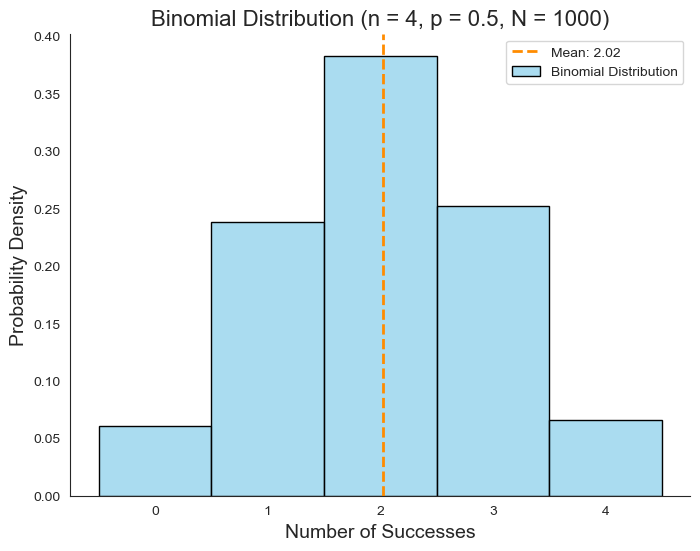

In [22]:
# Set up the parameters
n = 4
p = 0.5
N = 1000

# Generate binomial samples
binomial_samples = np.random.binomial(n, p, N)

# Calculate the mean of the binomial distribution
mean_binomial = np.mean(binomial_samples)

# Set Seaborn style for a clean look without a grid
sns.set_style("white")

# Create the plot with gaps between the bars
fig, ax = plt.subplots(figsize=(8, 6))
sns.histplot(binomial_samples, bins=np.arange(-0.5, n + 1.5, 1), stat='density', color='skyblue', edgecolor='black', discrete=True, alpha=0.7, label='Binomial Distribution')
ax.axvline(x=mean_binomial, color='darkorange', linestyle='dashed', linewidth=2, label=f'Mean: {mean_binomial:.2f}')

# Enhance the plot with more detailed information
plt.xlabel('Number of Successes', fontsize=14)
plt.ylabel('Probability Density', fontsize=14)
plt.title('Binomial Distribution (n = 4, p = 0.5, N = 1000)', fontsize=16)
plt.xticks(range(n + 1))
plt.legend()
sns.despine()  # Remove the top and right spines

# Display the plot
plt.show()

#### 3b) Compute the expected value of a function $g(x) = x^2$ where x follows a Poisson distribution with $\lambda = 2$. Use Monte Carlo integration. Is your result equal to $g(E(x))$? where $E(x) = \lambda = 2$ if x ~ Poisson($\lambda$)? Why?

In [23]:
## monte carlo, numerical integration 

# step 1: define the function

def g(x):
    return x**2


# step 2: create the distribution and the support 

N = 100000 ## large N to achieve LLN well
lam = 2
X = np.random.poisson(lam, N)
g_X = g(X) ## place the support into the function 

# step 3: numerically approximate 

integral_numerical = np.mean(g(X))

## step 4: print 

result_md = 'The expected value $E[g(x)]$ using Monte Carlo integration is approximately **{:.2f}**.'.format(integral_numerical)
Markdown(result_md)


The expected value $E[g(x)]$ using Monte Carlo integration is approximately **6.02**.

The results differ due to Jensen's inequality. For a convex function $g(x)$, $\mathbb{E}[g(x)] \geq g(\mathbb{E}[x])$. Since $g(x) = x^2$ is a convex function, Jensen's inequality applies.

In particular, when $g(x) = x^2$, $\mathbb{E}[g(x)] = \sum_{x=0}^{\infty} x^2 * \frac{e^{-\lambda} \lambda^x}{x!}$, while $g(\mathbb{E}[x]) = g(2) = 2^2 = 4$.


### Exercise 4. Simulating and computing expectations in an economy (10 points) Consider an economy where individual’s income ($y$) follows a log-normal distribution. 

####  4a) Simulate y for $N = 100,000$ and compute the average, the variance, and the Gini of $y$.

In [24]:
## Setting the parameters 
mean = 7.5
sigma = 0.8
N = 100000 
y = np.random.lognormal(mean, sigma, N)

In [25]:
y_mean_4a = 'When $N = 100,000$, the mean of $y$ is **{:,.2f}**.'.format(np.mean(y))

y_var_4a = 'When $N = 100,000$, the variance of $y$ is **{:,.2f}**'.format(np.var(y))

y_gini_4a = 'When $N = 100,000$, the Gini of $y$ is **{:,.2f}**'.format(gini(y))



markdown_table_4a = """
| Description           | Value                                  |
|-----------------------|----------------------------------------|
| Mean of $y$           | {mean:,.2f}                         |
| Variance of $y$       | {variance:,.2f}                    |
| Gini of $y$           | {gini:,.2f}                       |
""".format(mean=np.mean(y), variance=np.var(y), gini=gini(y))

display(Markdown(markdown_table_4a))




| Description           | Value                                  |
|-----------------------|----------------------------------------|
| Mean of $y$           | 2,492.33                         |
| Variance of $y$       | 5,603,017.98                    |
| Gini of $y$           | 0.43                       |


#### 4b) Now consider that individuals follow a consumption rule that takes the following functional form: ci = (yi)^ 0.8 + 0.5yi + 500. Compute the average, the variance, and the Gini coefficient of c.

In [26]:
def consumption(y):
    return y**0.8 + 0.5*y + 500

# Generate connsumption values
c = consumption(y)

# Calculate the averages, variance and gini coefficient of consumption
c_avg = round(np.mean(c),3)
c_var = round(np.var(c),3)
c_gini = round(gini(c),3)


markdown_table_4b = f"""
| Description               | Value                                  |
|---------------------------|----------------------------------------|
| Average Consumption       | \$ {c_avg:,.2f}                    |
| Variance of Consumption   | \$ {c_var:,.2f}                    |
| Gini Coefficient of Consumption | {gini(c):.2f}              |
"""

display(Markdown(markdown_table_4b))


| Description               | Value                                  |
|---------------------------|----------------------------------------|
| Average Consumption       | \$ 2,241.61                    |
| Variance of Consumption   | \$ 2,355,316.78                    |
| Gini Coefficient of Consumption | 0.32              |


#### 4c) Plot the distribution of y and c in the same graph.

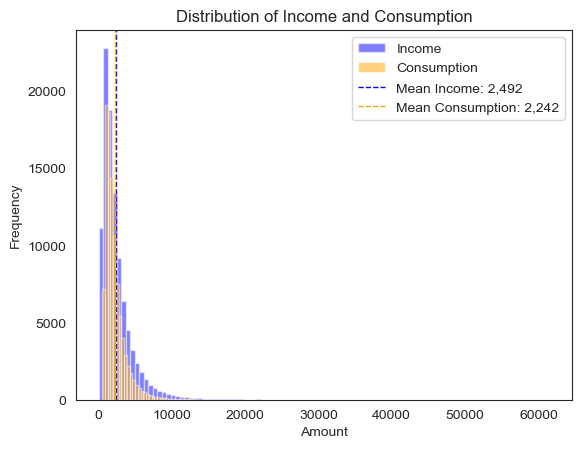

In [27]:
plt.figure()

# Plot histograms for income and consumption
plt.hist(y, bins=100, alpha=0.5, label='Income', color='blue')
plt.hist(c, bins=100, alpha=0.5, label='Consumption', color='orange')

# Add mean lines and labels for both income and consumption
plt.axvline(x=np.mean(y), color='blue', linestyle='dashed', linewidth=1, label=f'Mean Income: {np.mean(y):,.0f}')
plt.axvline(x=np.mean(c), color='orange', linestyle='dashed', linewidth=1, label=f'Mean Consumption: {np.mean(c):,.0f}')

plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Income and Consumption')
plt.legend()

# Show the plot
plt.show()
